In [2]:
%matplotlib inline

In [5]:
from bb_binary import FrameContainer, Repository, load_frame_container
from datetime import datetime, timedelta
from collections import namedtuple
from collections import Counter
import multiprocessing
import sqlite3
import matplotlib

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

from collections import Counter

from pandas import DataFrame, Series
import seaborn as sns

In [6]:
conn = sqlite3.connect('ids.db')

In [7]:
c = conn.cursor()

In [8]:
sql = 'SELECT * FROM IDS'

In [9]:
df = pd.read_sql(sql, conn)

In [164]:
df.head()

,MONTH,DAY,HOUR,ID,COUNT
0,08,19,16,0,0
1,08,19,16,1,0
2,08,19,16,2,0
3,08,19,16,3,0
4,08,19,16,4,2


# Statistik zu einer Stunde

In [11]:
dfh = df.query('(MONTH == "08") & (DAY == "20" ) & (HOUR == "12")')

In [12]:
dfh['frac'] = (100*dfh.COUNT)/(60*60*3)

/home/alexa/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
dfh.head()

,MONTH,DAY,HOUR,ID,COUNT,frac
81920,08,20,12,0,8,0.074074
81921,08,20,12,1,9,0.083333
81922,08,20,12,2,12,0.111111
81923,08,20,12,3,3,0.027778
81924,08,20,12,4,4,0.037037


In [14]:
dfh.shape

(4096, 6)

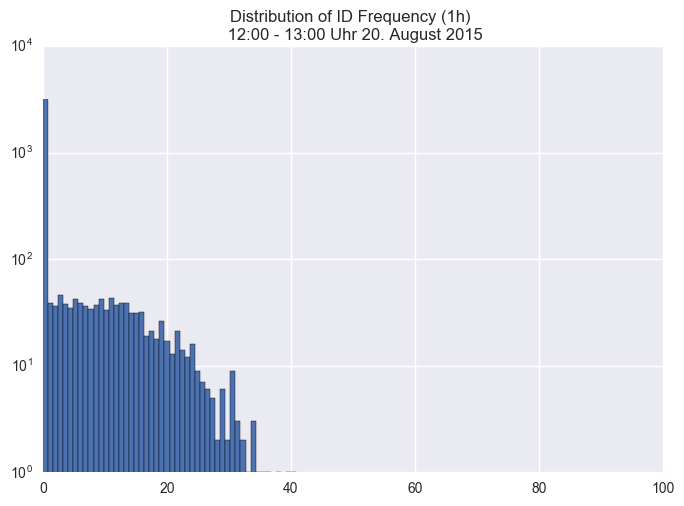

In [15]:
fig, ax = plt.subplots()
dfh.frac.hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Distribution of ID Frequency (1h) \n 12:00 - 13:00 Uhr 20. August 2015")


In [23]:
dfh0 = dfh[dfh.COUNT>0]

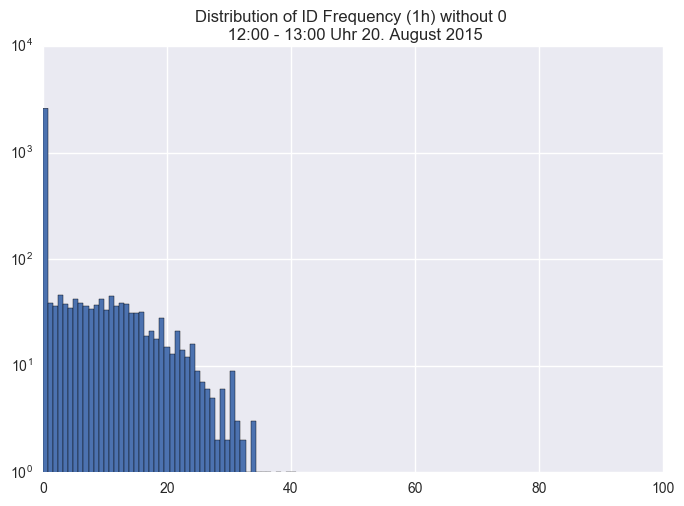

In [24]:
fig, ax = plt.subplots()
dfh0.frac.hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_title("Distribution of ID Frequency (1h) without 0 \n 12:00 - 13:00 Uhr 20. August 2015")

In [25]:
dfh0.shape[0]

3552

In [26]:
100*dfh0.shape[0]/(2**12)

86.71875

In [27]:
c = Counter(dfh0.COUNT.values)

In [28]:
c.values()

dict_values([536, 417, 263, 234, 175, 149, 125, 100, 90, 68, 53, 46, 46, 32, 28, 13, 1, 17, 21, 13, 12, 13, 14, 8, 7, 11, 6, 4, 5, 3, 8, 4, 1, 4, 3, 2, 2, 2, 6, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 4, 1, 2, 1, 2, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 2, 2, 2, 1, 1

In [29]:
dfh01 = dfh0[dfh0.COUNT > 15]

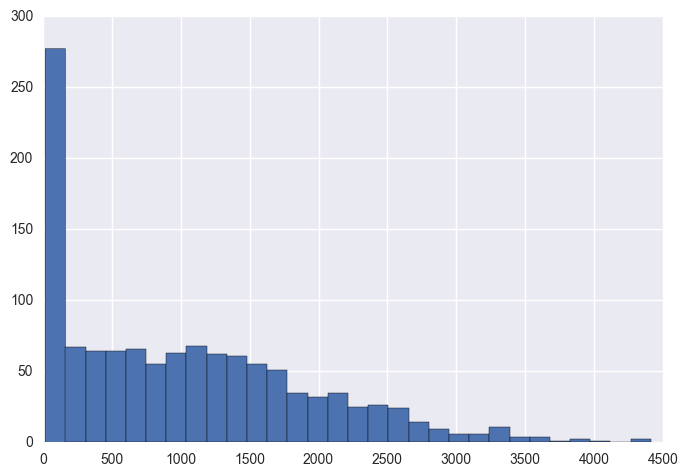

In [30]:
dfh01.COUNT.hist(bins=30)

# Statistik zu einem Tag 30.08.

In [181]:
dfd = df.query('(MONTH == "08") & (DAY == "30" )')

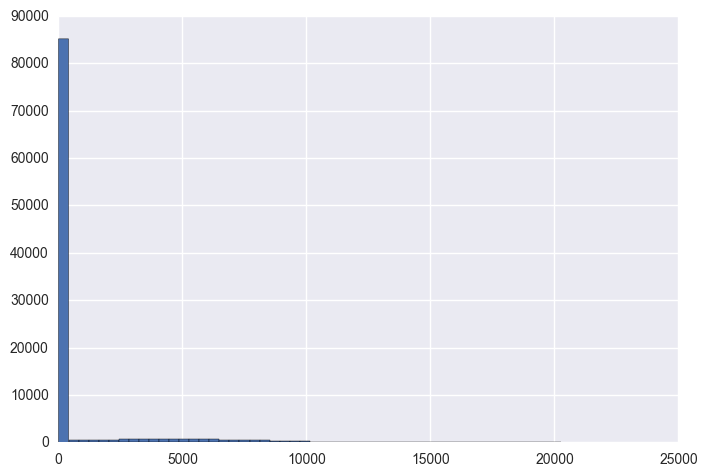

In [182]:
dfd.COUNT.hist(bins=50)

In [183]:
dfd.COUNT.describe()

count    98304.000000
mean       672.750244
std       1951.111652
min          0.000000
25%          1.000000
50%          3.000000
75%         14.000000
max      20271.000000
Name: COUNT, dtype: float64

In [184]:
dfd0 = dfd[dfd.COUNT > 0]

In [185]:
dfd0.head()

,MONTH,DAY,HOUR,ID,COUNT
991232,08,30,00,0,6
991233,08,30,00,1,4
991234,08,30,00,2,2
991236,08,30,00,4,1
991237,08,30,00,5,2


In [186]:
len(np.unique(list(dfd0.ID)))

4094

In [187]:
grouped = dfd0.groupby(by="ID")

In [189]:
# ID der Königin
for g, gr in grouped:
    if (g == 3258):
        print(gr)
        

        MONTH DAY HOUR    ID  COUNT
994490     08  30   00  3258      1
1002682    08  30   02  3258      1
1006778    08  30   03  3258      1
1023162    08  30   07  3258      1
1027258    08  30   08  3258      3
1039546    08  30   11  3258      1
1043642    08  30   12  3258      1
1047738    08  30   13  3258      1
1051834    08  30   14  3258      4
1060026    08  30   16  3258      1
1064122    08  30   17  3258      1


In [42]:
day = grouped['COUNT'].agg({'summe' : np.sum, 'meann' : np.mean})

In [43]:
day.head(10)

,meann,summe
ID,,
0,7.666667,184
1,5.916667,142
2,6.333333,133
3,10.277778,185
4,3.000000,51
5,7.473684,142
6,19.562500,313
7,8.458333,203
8,15.083333,362


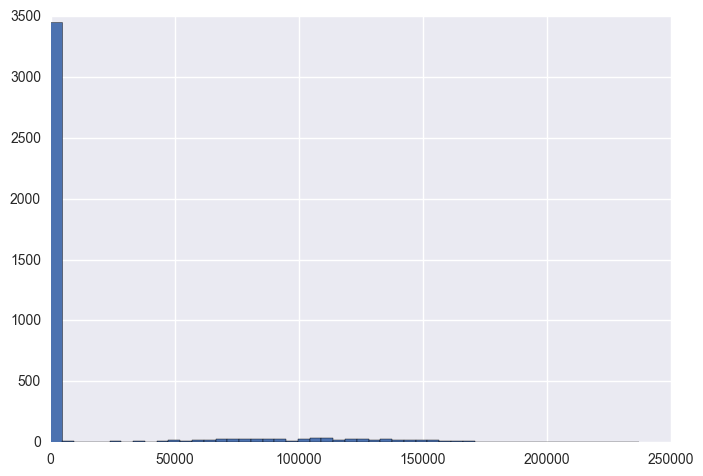

In [44]:
day.summe.hist(bins=50)

In [45]:
day.summe.describe()

count      4094.000000
mean      16153.893503
std       40263.683452
min           1.000000
25%          32.000000
50%         106.000000
75%         407.250000
max      237352.000000
Name: summe, dtype: float64

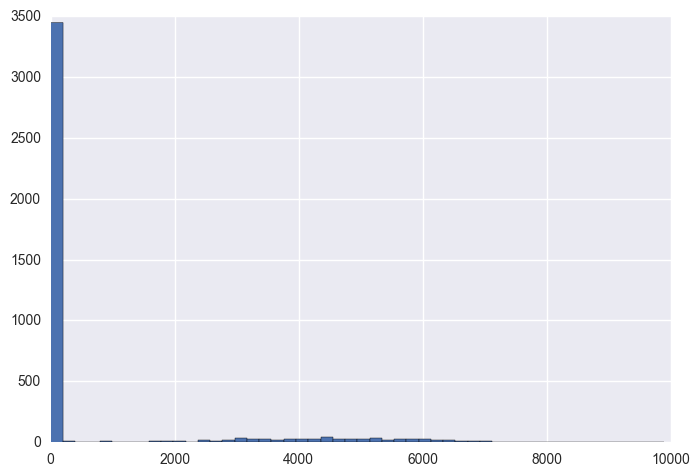

In [46]:
day.meann.hist(bins=50)

In [47]:
ghour = dfd0.groupby(by='HOUR')

In [48]:
data = ghour['ID'].nunique()

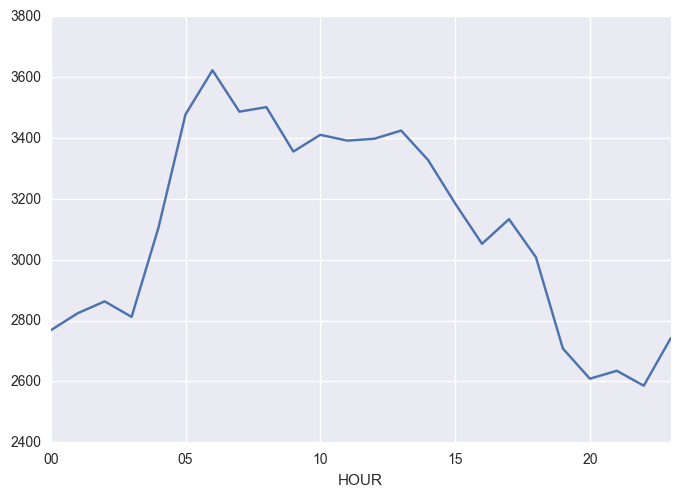

In [49]:
data.plot()

# Statistik zu einem Tag 21.08.

In [50]:
dfd21 = df.query('(MONTH == "08") & (DAY == "21" )')

In [51]:
dfd210 = dfd21[dfd21.COUNT > 0]

In [52]:
len(np.unique(list(dfd210.ID)))

4096

In [53]:
grouped21 = dfd210.groupby(by="ID")

In [54]:
day21 = grouped21['COUNT'].agg({'summe' : np.sum, 'mean' : np.mean})

In [55]:
ghour21 = dfd210.groupby(by='HOUR')

In [56]:
data21 = ghour21['ID'].nunique()

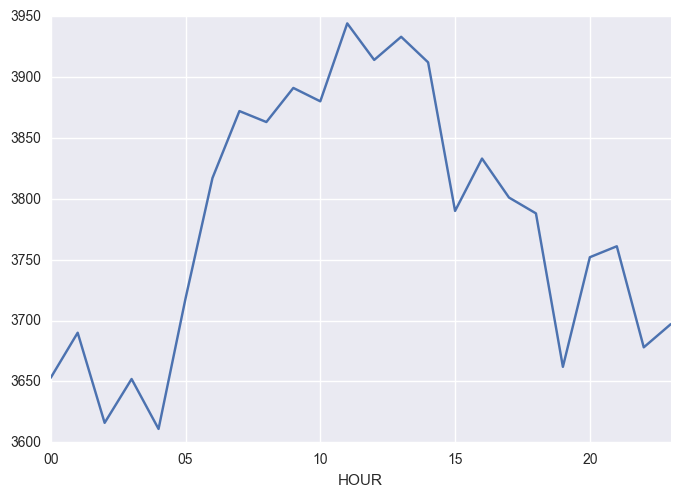

In [57]:
data21.plot()

# Plotten eines beliebigen Tages

In [58]:
def plotDayIDs(df, month, day):
    q = "(MONTH == '{}') & (DAY == '{}')".format(month, day)
    dfd = df.query(q)
    dfd0 = dfd[dfd.COUNT > 20]
    print(len(np.unique(list(dfd0.ID))))
    ghour = dfd0.groupby(by='HOUR')
    data = ghour['ID'].nunique()
    fig, ax = plt.subplots()
    data.plot(ax=ax)
    #ax.set_xlim(0,23)
    ax.set_ylim(0,2**12)
    ax.set_title("{}-{}".format(month,day))

2076


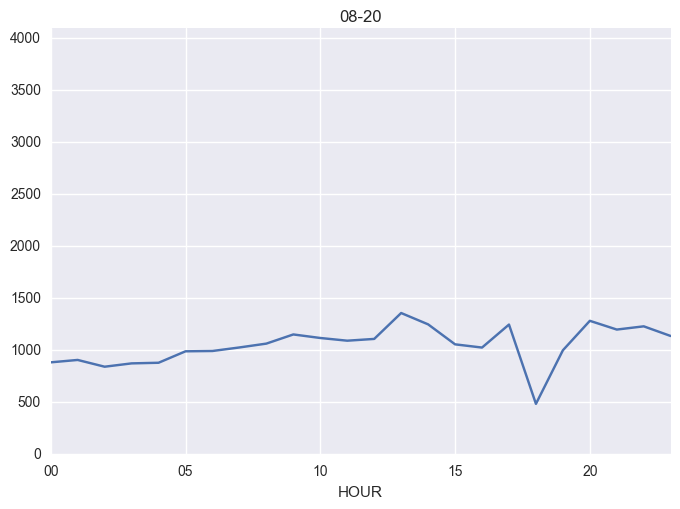

In [62]:
plotDayIDs(df, "08", "20")

In [63]:
# for i in list(range(19,32)):
#     i = str(i).zfill(2)
#     plotDayIDs(df, "08", i)

# Plot über den gesamten Zeitraum

In [67]:
df0 = df[df.COUNT > 15]

In [68]:
grouped = df0.groupby(by=['MONTH', 'DAY'])

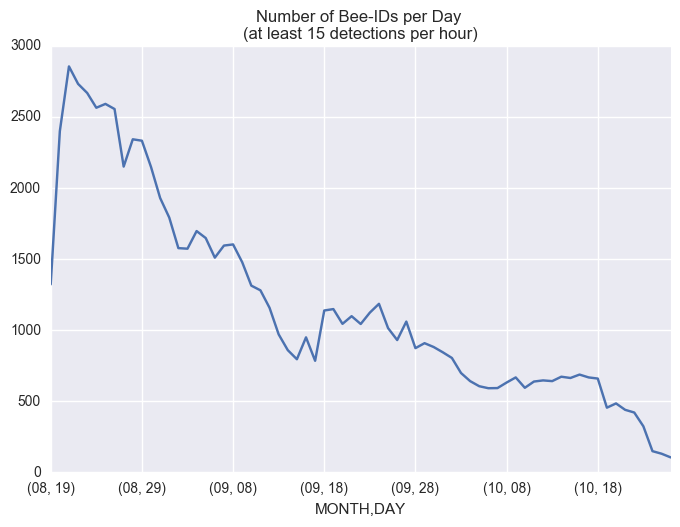

In [70]:
fig, ax = plt.subplots()
grouped.ID.nunique().plot(ax=ax)
ax.set_title("Number of Bee-IDs per Day \n(at least 15 detections per hour)")

# Plot gesamter Zeitraum jeder Tag

In [71]:
def dataPerDay(df, month, day):
    q = "(MONTH == '{}') & (DAY == '{}')".format(month, day)
    dfd = df.query(q)
    dfd0 = dfd[dfd.COUNT > 15]
    ghour = dfd0.groupby(by='HOUR')
    data = ghour['ID'].nunique()
    return data

In [112]:
data_all = []

for day in list(range(19,32)):
    data_all.append(("08", day, dataPerDay(df, "08", str(day).zfill(2))))

for day in list(range(1,31)):
    data_all.append(("09", day, dataPerDay(df, "09", str(day).zfill(2))))

for day in list(range(1,27)):
    data_all.append(("10", day, dataPerDay(df, "10", str(day).zfill(2))))

In [114]:
for i in list(range(len(data_all))):
    #print(i, data_all[i][0], data_all[i][1], len(data_all[i][2]))

SyntaxError: unexpected EOF while parsing (<ipython-input-114-fb87640603cf>, line 2)

In [167]:
df_list = []
df_columns = []
for item in data_all:
    df_list.append(item[2])
    df_columns.append("{}.{}.15 ".format(item[1], item[0]))

In [168]:
dd = pd.concat(df_list, axis=1)

In [169]:
dd.columns=df_columns

In [170]:
dd

,19.08.15,20.08.15,21.08.15,22.08.15,23.08.15,24.08.15,25.08.15,26.08.15,27.08.15,28.08.15,...,17.10.15,18.10.15,19.10.15,20.10.15,21.10.15,22.10.15,23.10.15,24.10.15,25.10.15,26.10.15
00,NaN,937,1355,1366,1241,1224,971,1137,1074.0,956,...,192,163,134,88,88,81,86,60,NaN,51.0
01,NaN,967,1366,1430,1343,1139,955,1089,NaN,1002,...,203,159,140,100,110,92,85,59,79.0,65.0
02,NaN,875,1267,1351,1266,1151,951,1169,NaN,934,...,205,186,111,111,96,87,86,65,50.0,59.0
03,NaN,923,1351,1462,1318,1102,981,1172,NaN,1057,...,217,171,137,93,106,82,86,63,53.0,54.0
04,NaN,919,1307,1382,1316,1208,1085,1193,NaN,1049,...,200,177,139,107,117,74,86,77,65.0,57.0
05,NaN,1034,1473,1571,1459,1288,1241,1259,NaN,1250,...,226,201,192,119,119,104,98,68,59.0,57.0
06,NaN,1056,1537,1625,1601,1490,1343,1471,NaN,1292,...,250,251,178,133,167,142,153,67,53.0,48.0
07,NaN,1086,1661,1795,1627,1477,1349,1526,NaN,1294,...,311,287,194,154,181,177,147,77,67.0,57.0
08,NaN,1131,1660,1691,1617,1573,1380,1454,1093.0,1408,...,279,289,193,222,177,182,142,68,69.0,52.0
09,NaN,1236,1736,1654,1563,1615,1478,1497,1452.0,1326,...,299,373,199,244,186,191,153,76,70.0,81.0


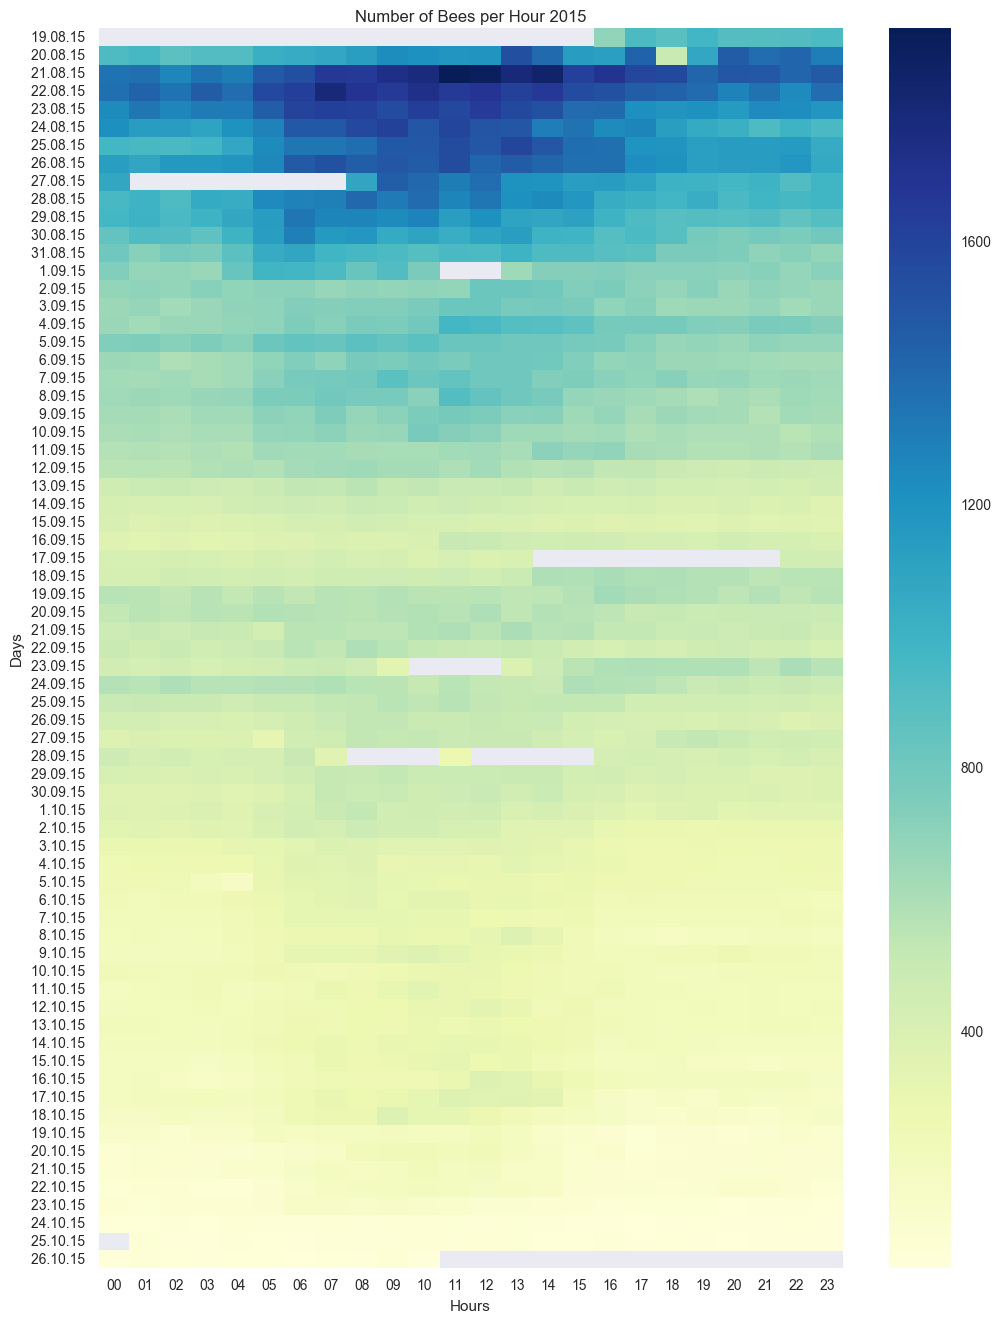

In [172]:
g = sns.heatmap(dd.transpose(), cmap="YlGnBu")
g.figure.set_size_inches(12,16)
g.set_title("Number of Bees per Hour 2015")
g.set_xlabel("Hours")
g.set_ylabel("Days")